In [1]:
def text_clean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

# Frequency Analysis

Frequency analysis is an import part of cryptanalysis. It's can be used to crack many of the classical ciphers previously covered in this textbook.

In this section, you will:
* learn the relative frequency of each character in the English language
* create bar charts using the `matplotlib` package
* crack a ciphertext created with the Caesar cipher

You will not learn to:
* efficiently crack ciphertext created with the affine cipher

You should already know how to:
* encrypt and decrypt messages using the Caesar cipher
* use the `str.count()` method to count occurrences of substrings in a plaintext or ciphertext message
* create `list` objects and append data to them
* `import` Python packages
* use the `text_clean` function to remove unwanted characters from strings

## English Letter Frequency

The English language has a predictable distribution of letters. Certain letters consistently appear more often than others. If you were to:

1. select an English-language book at 
2. count the number of occurrences for each English character, A-Z
3. compute the percentage of characters in the book comprised of each English character

you would see that regardless of the book you'd obtain approximately the same percentages.

Wikipedia provides the individual letter frequencies, shown in the table below.

In [16]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots

import numpy as np

LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

frequency_table = Table().with_columns("Letter", make_array('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'), "Wikipedia", make_array(8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074)/100)
frequency_table.set_format('Wikipedia', PercentFormatter(decimals=3))

Letter,Wikipedia
A,8.167%
B,1.492%
C,2.782%
D,4.253%
E,12.702%
F,2.228%
G,2.015%
H,6.094%
I,6.966%
J,0.153%


In [17]:
frequency_table.show()

Letter,Wikipedia
A,8.167%
B,1.492%
C,2.782%
D,4.253%
E,12.702%
F,2.228%
G,2.015%
H,6.094%
I,6.966%
J,0.153%


## Computing Letter Frequencies

The Wikipedia data lacks a proper citation for these values. You should verify these numbers are reasonable by computing letter frequencies for text contained in the book [Pride and Prejudice](https://www.gutenberg.org/ebooks/1342).

1. Download the [plaintext version](https://www.gutenberg.org/files/1342/1342-0.txt) of *Pride and Prejudice* from Project Gutenberg.
2. Read in the plaintext file, clean it using the `text_clean` function, and save the result to the string `text`. The output should only contain uppercase versions of the 26 English letters.

In [18]:
with open('pride-and-prejudice.txt', encoding="utf8") as f:
    text = text_clean(f.read())

3. Count the number times of each character appears in `text`. Then, compute the percentage of the entire book comprised of each letter.

In [32]:
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letter_frequencies = []
text_length = len(text)

for char in LETTERS:
    letter_frequencies.append(100*text.count(char)/text_length)
   
letter_frequencies

[7.738792200306681,
 1.6968936804213777,
 2.5491468405731954,
 4.140551082626144,
 12.905055880401802,
 2.244641245282882,
 1.893009784054782,
 6.268465183047739,
 7.0592734641499035,
 0.17581573061405004,
 0.6057486306310879,
 4.000261004795963,
 2.7414566242654708,
 7.019035224772256,
 7.499900310668209,
 1.5738226689915427,
 0.11563962487810714,
 6.066548972837376,
 6.139050305049356,
 8.72916039832232,
 2.811057903188971,
 1.0585194502948991,
 2.2788981247530424,
 0.15714663756946534,
 2.3620934034662886,
 0.1700156240370917]

The percentages are shown alongside the values provided by Wikipedia in the table below:

In [20]:
PP_frequency = make_array()
for char in LETTERS:
    PP_frequency = np.append(PP_frequency, text.count(char)/len(text) )

frequency_table = frequency_table.with_column('Pride and Prejudice', PP_frequency)
frequency_table.set_format('Pride and Prejudice', PercentFormatter(decimals=3)).set_format('Wikipedia', PercentFormatter(decimals=3))

Letter,Wikipedia,Pride and Prejudice
A,8.167%,7.739%
B,1.492%,1.697%
C,2.782%,2.549%
D,4.253%,4.141%
E,12.702%,12.905%
F,2.228%,2.245%
G,2.015%,1.893%
H,6.094%,6.268%
I,6.966%,7.059%
J,0.153%,0.176%


In [21]:
frequency_table.show()

Letter,Wikipedia,Pride and Prejudice
A,8.167%,7.739%
B,1.492%,1.697%
C,2.782%,2.549%
D,4.253%,4.141%
E,12.702%,12.905%
F,2.228%,2.245%
G,2.015%,1.893%
H,6.094%,6.268%
I,6.966%,7.059%
J,0.153%,0.176%


The values provided from Wikipedia are very close to the values produced by analyzing *Pride and Prejudice*. Some values are within 0.01 of each other. The results of this analysis indicate it is reasonable to use the values provided by Wikipedia, even though they do not match perfectly with *Pride and Prejudice*. 

Analyzing only a single text often leads to slight deviations from the average values provided by Wikipedia. Letter frequency will naturally differ by author and subject. However, combining multiple lengthy texts will likely demonstrate a letter frequency distribution similar to the values found in the Wikipedia article.

## Visualization in Python

Numerical data is difficult to analyze when formatted as a list. A data visualization will quickly reveal patterns and trends in the data. The summary data stored to the list `letter_frequencies` is categorical; a bar chart would is the most appropriate way to visualize the categorical data it represents.

Python has several data visualization packages, including: Matplotlib, Seaborn, Altair, Bokeh, Plotly, and more. This course will expect data visualizations to be created using Matplotlib.

### Creating Bar Charts

To create a bar chart of the data stored in `letter_frequencies`:

1. **Import the Matplotlib library.** Most installations of Python include this package by default. If not, visit [Matplotlib](https://matplotlib.org/) to learn how to install it.

In [22]:
import matplotlib.pyplot as plt

2. **Construct a bar chart by calling `plt.bar()`.** `plt.bar()` accepts two list arguments: the first contains the labels for the categorical data, the second contains the numerical data that represents the height of the bars.

<BarContainer object of 26 artists>

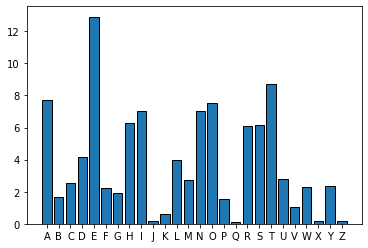

In [23]:
plt.bar(list(LETTERS), letter_frequencies)

3. **Configure the labels on the bar chart.** Matplotlib allows you to customize almost every aspect of the chart, including the x-axis label, y-axis label, and chart title.

Text(0.5, 1.0, 'Frequency Analysis')

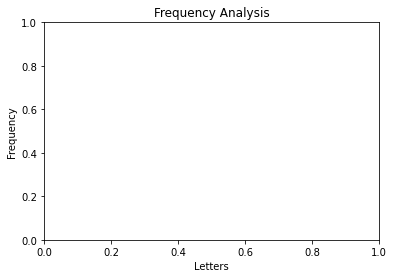

In [24]:
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency Analysis')

4. **Show the chart**. The previous commands have generated the chart and configured the chart, but have not yet displayed it. Combine the earlier commands with `plt.show()` to display customized bar chart.

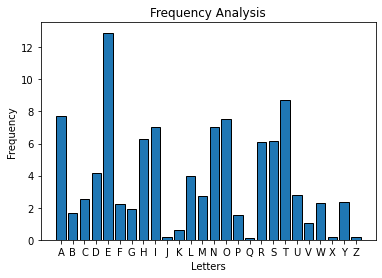

In [25]:
plt.bar(list(LETTERS), letter_frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency Analysis')
plt.show()

### Analyzing a Bar Chart

The bar chart reveals several observations that are helpful for cryptanalysis.
* A and E are both high frequency letters spaced 4 apart from each other
* H and I are relatively high frequency letters adjacent to each other
* N and O are relatively high frequency letters adjacent to each other
* R, S, and T are relatively high frequency letters adjacent to each other
* Most other letters have relatively low frequency, some with very low frequency

Together these traits form a "fingerprint" for the English language. The distribution has predictable peaks and valleys. If a plaintext and ciphertext alphabets retain the same order, like when the Caesar cipher is used, then the same peaks and valleys will appear but shifted.

For example, consider the following  ciphertext created with the Caesar cipher and corresponding frequency distribution:
> `PMOLO HKHUF AOPUN JVUMP KLUAP HSAVZ HFOLD YVALP APUJP WOLYA OHAPZ IFZVJ OHUNP UNAOL VYKLY VMAOL SLAAL YZVMA OLHSW OHILA AOHAU VAHDV YKJVB SKILT HKLVB A`

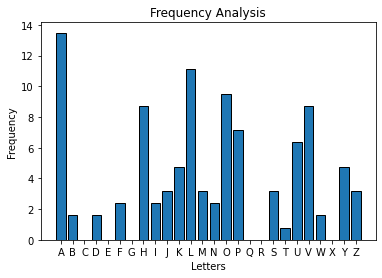

In [26]:
def letter_frequency(text):
    text = text_clean(text)
    frequencyList = []
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in LETTERS:
        frequencyList.append( 100 * text.count(char) / len(text))
    
    return frequencyList

values = letter_frequency('PMOLO HKHUF AOPUN JVUMP KLUAP HSAVZ HFOLD YVALP APUJP WOLYA OHAPZ IFZVJ OHUNP UNAOL VYKLY VMAOL SLAAL YZVMA OLHSW OHILA AOHAU VAHDV YKJVB SKILT HKLVB A' )
plt.bar(list(LETTERS), values)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency Analysis')
plt.show()

Even with this fairly short piece of ciphertext, you can observe the following:
* H and L in the ciphertext likely correspond to A and E in the plaintext
* O and P in the ciphertext correspond to H and I in the plaintext
* U and V in the ciphertext correspond to N and O in the plaintext
* Y, Z, and A in the ciphertext correspond to, R, S, and T in the plaintext

If you assume that the ciphertext letter `L` corresponds to the plaintext letter `e` then you can determine the key used in the Caesar cipher. Since `L` has a position of 11 in the alphabet, `e` has a position of 4, the difference in their positional values is 7, which is equivalent to the key.

```{note} 
This example made a guess about the ciphertext letter than corresponded to the plaintext letter `e`. This could have just as easily been completed using a guess regarding which ciphertext letter corresponded to any other the plaintext character. `a` and `e` are frequent choices beause they are fairly easy to spot in the bar chart.
```

Applying the key of 7 to the ciphertext yields the following plaintext:

>If he had anything confidential to say, he wrote it in cipher, that is, by so changing the order of the letters of the alphabet, that not a word could be made out.

Suetonius, *Life of Julius Caesar* 56

### Exercise for the Reader
Write a function `character_frequency` that:
1. takes in a string of text
2. cleans the string using the `text_clean` function
3. returns a list of 26 frequencies in order from A to Z

## Frequency Analysis for the Affine Cipher

Frequency analysis on ciphertext generated with the Affine cipher requires additional consideration. The order of the plaintext alphabet is not preserved in the ciphertext alphabet. As a result, you can't search for the the peaks that correspond to the A/E, H/I, N/O, R/S/T plaintext groupings. 

For example, consider this ciphertext generated with an affine cipher:

>`KRETI JUKRP TUCHI GRDPT UHUJK XUDET IVVKP RIPER EYPWD KHPWO UPTIJ ULKJJ UDOKP TPTUU RDYIL OIHAY ERDER IINWY AUJJR IHWUP EDHWV EHUYE RDWTI JUOKP TRIPT KRCKR KPPIY KPDIO RIRIH PIUEP KPOEY ETIVV KPTIJ UERDP TEPAU ERYMI ALIHP KPTED EZUHL UMPJW HIGRD DIIHJ KSUEZ IHPTI JUZEK RPUDC HUURO KPTEY TKRWW UJJIO VHEYY SRIVK RPTUU FEMPA KDDJU PTUDI IHIZU RUDIR PIEPG VUYTE ZUDTE JJJKS UEPGR RUJEX UHWMI ALIHP EVJUP GRRUJ OKPTI GPYAI SUOKP TZERU JJUDO EJJYE RDLJI IHYPK JUDER DMEHZ UPUDZ HIXKD UDOKP TZIJK YTUDM TEKHY ERDJI PYERD JIPYI LZUCY LIHTE PYERD MIEPY PTUTI VVKPO EYLIR DILXK YKPIH YPTUP GRRUJ OIGRD IRERD IRCIK RCLEK HJWVG PRIPQ GKPUY PHEKC TPKRP IPTUY KDUIL PTUTK JJPTU TKJJE YEJJP TUZUI ZJULI HAERW AKJUY HIGRD MEJJU DKPER DAERW JKPPJ UHIGR DDIIH YIZUR UDIGP ILKPL KHYPI RIRUY KDUER DPTUR IRERI PTUHR ICIKR CGZYP EKHYL IHPTU TIVVK PVUDH IIAYV EPTHI IAYMU JJEHY ZERPH KUYJI PYILP TUYUO EHDHI VUYTU TEDOT IJUHI IAYDU XIPUD PIMJI PTUYS KPMTU RYDKR KRCHI IAYEJ JOUHU IRPTU YEAUL JIIHE RDKRD UUDIR PTUYE AUZEY YECUP TUVUY PHIIA YOUHU EJJIR PTUJU LPTER DYKDU CIKRC KRLIH PTUYU OUHUP TUIRJ WIRUY PITEX UOKRD IOYDU UZYUP HIGRD OKRDI OYJII SKRCI XUHTK YCEHD URERD AUEDI OYVUW IRDYJ IZKRC DIORP IPTUH KXUH`

The bar chart that corresponds to the ciphertext is shown below:

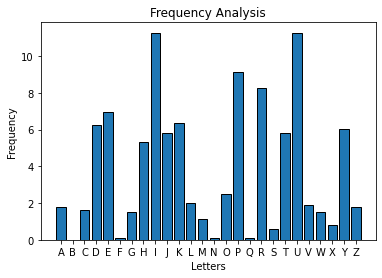

In [27]:
values = letter_frequency('KRETI JUKRP TUCHI GRDPT UHUJK XUDET IVVKP RIPER EYPWD KHPWO UPTIJ ULKJJ UDOKP TPTUU RDYIL OIHAY ERDER IINWY AUJJR IHWUP EDHWV EHUYE RDWTI JUOKP TRIPT KRCKR KPPIY KPDIO RIRIH PIUEP KPOEY ETIVV KPTIJ UERDP TEPAU ERYMI ALIHP KPTED EZUHL UMPJW HIGRD DIIHJ KSUEZ IHPTI JUZEK RPUDC HUURO KPTEY TKRWW UJJIO VHEYY SRIVK RPTUU FEMPA KDDJU PTUDI IHIZU RUDIR PIEPG VUYTE ZUDTE JJJKS UEPGR RUJEX UHWMI ALIHP EVJUP GRRUJ OKPTI GPYAI SUOKP TZERU JJUDO EJJYE RDLJI IHYPK JUDER DMEHZ UPUDZ HIXKD UDOKP TZIJK YTUDM TEKHY ERDJI PYERD JIPYI LZUCY LIHTE PYERD MIEPY PTUTI VVKPO EYLIR DILXK YKPIH YPTUP GRRUJ OIGRD IRERD IRCIK RCLEK HJWVG PRIPQ GKPUY PHEKC TPKRP IPTUY KDUIL PTUTK JJPTU TKJJE YEJJP TUZUI ZJULI HAERW AKJUY HIGRD MEJJU DKPER DAERW JKPPJ UHIGR DDIIH YIZUR UDIGP ILKPL KHYPI RIRUY KDUER DPTUR IRERI PTUHR ICIKR CGZYP EKHYL IHPTU TIVVK PVUDH IIAYV EPTHI IAYMU JJEHY ZERPH KUYJI PYILP TUYUO EHDHI VUYTU TEDOT IJUHI IAYDU XIPUD PIMJI PTUYS KPMTU RYDKR KRCHI IAYEJ JOUHU IRPTU YEAUL JIIHE RDKRD UUDIR PTUYE AUZEY YECUP TUVUY PHIIA YOUHU EJJIR PTUJU LPTER DYKDU CIKRC KRLIH PTUYU OUHUP TUIRJ WIRUY PITEX UOKRD IOYDU UZYUP HIGRD OKRDI OYJII SKRCI XUHTK YCEHD URERD AUEDI OYVUW IRDYJ IZKRC DIORP IPTUH KXUH')
plt.bar(list(LETTERS), values)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency Analysis')
plt.show()

The above bar chart does not demonstrate any of the patterns that were present when the ciphertext was generated with a Caesar cipher. It doesn't share a *fingerprint* with the English language as seen previously.

Instead, create a bar chart with bars ordered from left to right in decreasing frequency. This type of bar chart will allow you to make easy correspondences between the most frequent ciphertext letters and the most frequent plaintext letters. These correspondences are the most likely mappings between the two alphabets. 

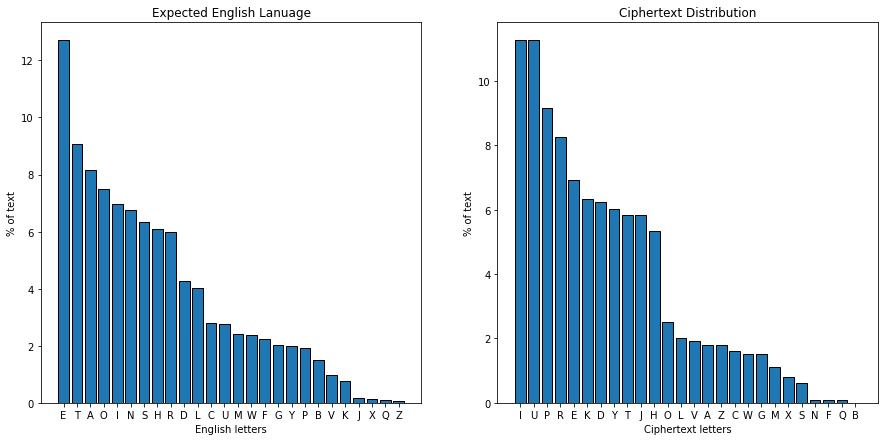

In [28]:
import matplotlib.pyplot as plt
ciphertext = 'KRETIJUKRPTUCHIGRDPTUHUJKXUDETIVVKPRIPEREYPWDKHPWOUPTIJULKJJUDOKPTPTUURDYILOIHAYERDERIINWYAUJJRIHWUPEDHWVEHUYERDWTIJUOKPTRIPTKRCKRKPPIYKPDIORIRIHPIUEPKPOEYETIVVKPTIJUERDPTEPAUERYMIALIHPKPTEDEZUHLUMPJWHIGRDDIIHJKSUEZIHPTIJUZEKRPUDCHUUROKPTEYTKRWWUJJIOVHEYYSRIVKRPTUUFEMPAKDDJUPTUDIIHIZURUDIRPIEPGVUYTEZUDTEJJJKSUEPGRRUJEXUHWMIALIHPEVJUPGRRUJOKPTIGPYAISUOKPTZERUJJUDOEJJYERDLJIIHYPKJUDERDMEHZUPUDZHIXKDUDOKPTZIJKYTUDMTEKHYERDJIPYERDJIPYILZUCYLIHTEPYERDMIEPYPTUTIVVKPOEYLIRDILXKYKPIHYPTUPGRRUJOIGRDIRERDIRCIKRCLEKHJWVGPRIPQGKPUYPHEKCTPKRPIPTUYKDUILPTUTKJJPTUTKJJEYEJJPTUZUIZJULIHAERWAKJUYHIGRDMEJJUDKPERDAERWJKPPJUHIGRDDIIHYIZURUDIGPILKPLKHYPIRIRUYKDUERDPTURIRERIPTUHRICIKRCGZYPEKHYLIHPTUTIVVKPVUDHIIAYVEPTHIIAYMUJJEHYZERPHKUYJIPYILPTUYUOEHDHIVUYTUTEDOTIJUHIIAYDUXIPUDPIMJIPTUYSKPMTURYDKRKRCHIIAYEJJOUHUIRPTUYEAULJIIHERDKRDUUDIRPTUYEAUZEYYECUPTUVUYPHIIAYOUHUEJJIRPTUJULPTERDYKDUCIKRCKRLIHPTUYUOUHUPTUIRJWIRUYPITEXUOKRDIOYDUUZYUPHIGRDOKRDIOYJIISKRCIXUHTKYCEHDURERDAUEDIOYVUWIRDYJIZKRCDIORPIPTUHKXUH'.replace(' ', '')

pvalues = [8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074]
pvalues.sort(reverse=True)
plabels = ['E', 'T', 'A', 'O', 'I', 'N', 'S', 'H', 'R', 'D', 'L', 'C', 'U', 'M', 'W', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', 'J', 'X', 'Q', 'Z']

shell = []
for char in plabels:
    shell.append([char, 100*ciphertext.count(char)/len(ciphertext)])

def takeSecond(elem):
    return elem[1]

shell.sort(key=takeSecond, reverse=True)

cvalues = []
clabels = []
for i in shell:
    clabels.append(i[0])
    cvalues.append(i[1])    

fig, ax =plt.subplots(1,2, figsize=(15, 7))
ax[0].set_title('Expected English Lanuage')
ax[0].set(xlabel='English letters', ylabel='% of text')
ax[1].set_title('Ciphertext Distribution')
ax[1].set(xlabel='Ciphertext letters', ylabel='% of text')
ax[0].bar(plabels, pvalues);
ax[1].bar(clabels, cvalues);

The distributions vary slightly but have a similar shape. The bar charts indicate that the ciphertext letters I and U are the most frequent letters, and likely correspond to the letters E and T. If you were to assume corresponding letters in the bar charts reveal the true mapping, and that ($\text{I} \rightarrow \text{e}$, $\text{U} \rightarrow \text{t}$, etc.),  deciphering the message yields the following:

In [33]:
import textwrap
for i in plabels:
    #print(i, clabels[ plabels.index(i) ].lower())
    ciphertext = ciphertext.replace(i, clabels[ plabels.index(i) ].lower())

for line in textwrap.wrap(ciphertext,width=80):
    print(line)

stiuenlstguloyectjgulylnsfljiuexxsgtegitiwgajsygarlguenlhsnnljrsgugulltjwehreypw
itjiteekawplnnteyalgijyaxiylwitjauenlrsgutegustostsggewsgjerteteygeligsgriwiuexx
sguenlitjguigplitwvepheygsguijiblyhlvgnayectjjeeynsdlibeyguenlbistgljoylltrsguiw
ustaalnnerxyiwwdtexstgullzivgpsjjnlguljeeyebltljetgeigcxlwuibljuinnnsdligcttlnif
lyavepheygixnlgcttlnrsguecgwpedlrsgubitlnnljrinnwitjhneeywgsnljitjviyblgljbyefsj
ljrsgubenswuljvuisywitjnegwitjnegwehblowheyuigwitjveigwguluexxsgriwhetjehfswsgey
wgulgcttlnrectjetitjetoestohisynaxcgtegqcsglwgyisougstgegulwsjlehgulusnngulusnni
winngulblebnlheypitapsnlwyectjvinnljsgitjpitansggnlyectjjeeywebltljecgehsghsywge
tetlwsjlitjgultetitegulyteoestocbwgisywheyguluexxsgxljyeepwxiguyeepwvlnniywbitgy
slwnegwehgulwlriyjyexlwuluijruenlyeepwjlfegljgevnegulwdsgvultwjststoyeepwinnrlyl
etgulwiplhneeyitjstjlljetgulwiplbiwwiolgulxlwgyeepwrlylinnetgulnlhguitjwsjloesto
stheygulwlrlylguletnaetlwgeuiflrstjerwjllbwlgyectjrstjerwneedstoeflyuswoiyjltitj
plijerwxlaetjwnebstojertgegu

> `stiuenlstguloyectjgulylnsfljiuexxsgtegitiwgajsygarlguenlhsnnljrsgugulltjwehreypw
itjiteekawplnnteyalgijyaxiylwitjauenlrsgutegustostsggewsgjerteteygeligsgriwiuexx
sguenlitjguigplitwvepheygsguijiblyhlvgnayectjjeeynsdlibeyguenlbistgljoylltrsguiw
ustaalnnerxyiwwdtexstgullzivgpsjjnlguljeeyebltljetgeigcxlwuibljuinnnsdligcttlnif
lyavepheygixnlgcttlnrsguecgwpedlrsgubitlnnljrinnwitjhneeywgsnljitjviyblgljbyefsj
ljrsgubenswuljvuisywitjnegwitjnegwehblowheyuigwitjveigwguluexxsgriwhetjehfswsgey
wgulgcttlnrectjetitjetoestohisynaxcgtegqcsglwgyisougstgegulwsjlehgulusnngulusnni
winngulblebnlheypitapsnlwyectjvinnljsgitjpitansggnlyectjjeeywebltljecgehsghsywge
tetlwsjlitjgultetitegulyteoestocbwgisywheyguluexxsgxljyeepwxiguyeepwvlnniywbitgy
slwnegwehgulwlriyjyexlwuluijruenlyeepwjlfegljgevnegulwdsgvultwjststoyeepwinnrlyl
etgulwiplhneeyitjstjlljetgulwiplbiwwiolgulxlwgyeepwrlylinnetgulnlhguitjwsjloesto
stheygulwlrlylguletnaetlwgeuiflrstjerwjllbwlgyectjrstjerwneedstoeflyuswoiyjltitj
plijerwxlaetjwnebstojertgegulysfly`

This text is not English. In fact, there's nothing close to a coherent message.

```{warning} 
**Directly Comparing Sorted Frequencies is Sensitive to Errors**. If a letter is under- or over-represented in the plaintext message, it will also be under- or over-represented in the ciphertext. When the bars are arranged by frequency, a bar that is misplaced may does not impact the relative order of bars in a single bar char. However, it will impact nearly all the correspondences between the ciphertext and expected English bar charts and can lead to numerous incorrect mappings between the alphabets.
```

For example, this message used the plaintext character `l` less than usual. The encryption process mapped the plaintext letter `l` to the ciphertext letter `J`. Therefore, the ciphertext letter `J` appears inherits the same frequency that was lower than expected. As a result, the bar for `J` will appear lower in the ciphertext distribution than it would have if the plaintext letter `l` had been used normally.  Comparing the corresponding bars you would incorrectly assume that the ciphertext letter `J` corresponds with the plaintext letter `d` since they are both 10th in position in the bar charts. Not only is this incorrect, but because the bar for `J` is misplaced several other letters were incorrectly positioned. You should take care to ensure that your text does not have an unusual characteristics that would cause this type of analysis to lead to these types of errors.

The actual plaintext message is:
> In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort. It had a perfectly round door like a porthole, painted green, with a shiny yellow brass knob in the exact middle. The door opened on to a tube-shaped hall like a tunnel: a very comfortable tunnel without smoke, with panelled walls, and floors tiled and carpeted, provided with polished chairs, and lots and lots of pegs for hats and coats - the hobbit was fond of visitors. The tunnel wound on and on, going fairly but not quite straight into the side of the hill - The Hill, as all the people for many miles round called it - and many little round doors opened out of it, first on one side and then on another. No going upstairs for the hobbit: bedrooms, bathrooms, cellars, pantries (lots of these), wardrobes (he had whole rooms devoted to clothes), kitchens, dining-rooms, all were on the same floor, and indeed on the same passage. The best rooms were all on the left-hand side (going in), for these were the only ones to have windows, deep-set round windows looking over his garden and meadows beyond, sloping down to the river.